In [1]:
import numpy as np
from SERGIO.GRN import grn_from_human,grn_from_networkx
from SERGIO._sergio import sergio
from SERGIO.MR import mrProfile
import pandas as pd
from SERGIO.GRN._grn import GRN
from SERGIO.GRN._components import Gene, SingleInteraction
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate GRN

Use regulatory network from Zhi-Ping Liu, Canglin Wu, Hongyu Miao and Hulin Wu (2015). RegNetwork: an integrated database of transcriptional and posttranscriptional regulatory networks in human and mouse. Database 2015. doi: [10.1093/database/bav095](10.1093/database/bav095)

In [2]:
grn = grn_from_human()

In [3]:

mrs = grn.get_mrs()
mr_profs = mrProfile(MR_names = mrs, n_types = 1)
mr_profs.build_rnd(range_dict={'L': [1, 2.5], 'H': [3.5, 5]})


In [4]:
grn.init(mr_profs, update_half_resp = True)
sim = sergio(grn)
%time sim.simulate(nCells = 100, noise_s = 1, safety_iter = 150, scale_iter = 10)

CPU times: user 11.3 s, sys: 0 ns, total: 11.3 s
Wall time: 11.3 s


In [5]:
expr = sim.getSimExpr()

In [6]:
expr

,type_0_cell_0,type_0_cell_1,type_0_cell_2,type_0_cell_3,type_0_cell_4,type_0_cell_5,type_0_cell_6,type_0_cell_7,type_0_cell_8,type_0_cell_9,...,type_0_cell_90,type_0_cell_91,type_0_cell_92,type_0_cell_93,type_0_cell_94,type_0_cell_95,type_0_cell_96,type_0_cell_97,type_0_cell_98,type_0_cell_99
4842,0.560621,1.197514,0.023346,0.770549,0.776099,0.395308,0.753965,0.000000,0.718456,0.026395,...,0.347011,0.022724,0.578939,0.110999,0.751991,0.374620,0.649507,1.095068,0.570530,1.331280
10365,1.153734,1.190627,0.100355,0.083708,0.298895,0.549488,1.244715,0.507445,1.313205,0.000000,...,0.425327,0.000000,0.148299,0.702562,0.000000,1.016979,0.049338,1.066647,0.972460,0.372646
4843,1.542440,0.000000,1.593493,0.815023,2.364566,7.406224,0.766968,1.840057,0.596388,1.338284,...,3.778790,0.358384,2.792469,2.059052,1.660225,4.490920,1.226406,0.000000,1.447571,1.413631
4846,1.827590,1.105600,0.642143,1.669399,0.995652,1.292950,1.944649,0.390610,1.626936,0.635485,...,1.383995,0.175594,0.125911,0.646435,0.962099,2.635996,2.422280,1.022205,2.105545,3.074252
445,0.537868,0.601998,1.245798,0.055588,0.317004,0.395770,0.585509,0.932359,0.589002,1.058474,...,1.057482,1.193802,0.735958,1.046595,0.138776,1.157032,0.444185,0.717198,0.418052,0.067865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,1.121502,0.289981,2.544143,1.173548,1.753416,0.334835,1.256120,1.819655,0.569953,1.876477,...,0.614029,2.441266,1.104264,1.546160,1.846077,0.555509,1.650074,0.199517,1.187846,1.027346
3126,0.321784,0.825015,0.371900,0.339016,0.867026,0.194946,0.373109,1.003808,0.672469,0.915487,...,0.076131,0.324421,1.953277,0.921129,0.560876,0.149863,0.884143,0.800537,0.390002,0.291461
3127,1.012153,0.900840,0.391178,2.614706,0.862785,0.971745,0.331950,0.151106,1.026358,0.276643,...,0.828874,0.365461,0.747088,0.095492,1.946728,0.264345,0.711970,0.876153,0.890621,1.923911
6095,1.004292,0.492185,1.724344,0.636762,0.346012,0.861753,0.284647,0.591574,0.140583,0.830451,...,3.223143,2.829619,0.987722,0.588533,0.772121,4.961081,0.161044,0.662748,1.079608,0.205796


# Use custom graph from networkx

In [8]:
import networkx as nx

In [12]:
# create a networkx.DiGraph()
G = nx.DiGraph()
G.add_edges_from([('1','2',{'weight':2}),('2','3',{'weight':-1}),('3','1',{'weight':3})])# if weight is not given, grn_from_networkx will parametrize automatically

# convert the networkx.DiGraph() to a GRN object
grn = grn_from_networkx(g= G, parametrize=False)

In [13]:
mrs = grn.get_mrs()
mr_profs = mrProfile(MR_names = mrs, n_types = 2)
mr_profs.build_rnd(range_dict={'L': [1, 2.5], 'H': [3.5, 5]})
grn.init(mr_profs, update_half_resp = True)
sim = sergio(grn)
sim.simulate(nCells = 200, noise_s = 1, safety_iter = 150, scale_iter = 10)

In [15]:
expr = sim.getSimExpr()

In [23]:
a = set(A.edges())
a.add(1)#note that Sergio removes cycles

## Add Technical Noise _ Steady-State Simulations

In [16]:
"""
Add outlier genes
"""
expr_O = sim.outlier_effect(expr, outlier_prob = 0.01, mean = 0.8, scale = 1)

"""
Add Library Size Effect
"""
libFactor, expr_O_L = sim.lib_size_effect(expr_O, mean = 4.6, scale = 0.4)

"""
Add Dropouts
"""
binary_ind = sim.dropout_indicator(expr_O_L, shape = 6.5, percentile = 82)
expr_O_L_D = np.multiply(binary_ind, expr_O_L)

"""
Convert to UMI count
"""
count_matrix = sim.convert_to_UMIcounts(expr_O_L_D)



((400, 417), (417, 400))

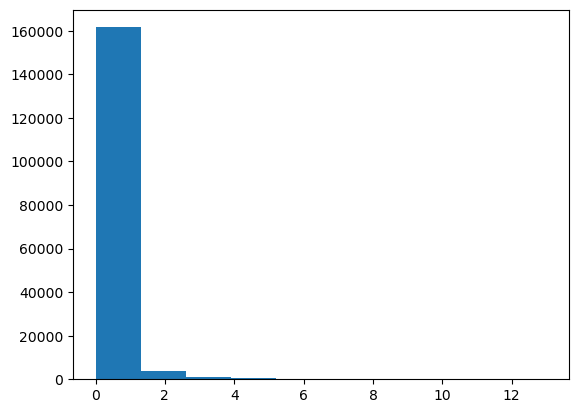

In [23]:
plt.hist(count_matrix.ravel())
expr_O_L.shape,expr.shape

# Simulate perturbation
In the following, we perturb nodes that have a successor, and we measure the effect of perturbation.

In [6]:
from SERGIO._perturbation import Perturbation

select production rate for nodes perturbed with crispri and crispra. The idea is that
`basal_prod_crispri`$\ll$`basal_prod_crispra ` should be a small number, while


In [8]:
pert = Perturbation()
pert.initialise_parameters(grn,basal_prod_crispri = 0.2,basal_prod_crispra = 7)#select production rate for nodes perturbed with crispri and crispra.

INFO:SERGIO._perturbation:Number of nodes will be perturbed is 43


In [9]:
%time pert.perturbation_all(nCells=10)
#pert.save()

CPU times: user 28.8 s, sys: 652 ms, total: 29.4 s
Wall time: 35.8 s


Now it has been generated `pert.crispri_data`,`pert.crispra_data` and `pert.wt`, which contains perturbation and wild type information.
`pert.crispri_data` is structured as follows:
- dimension 0 describes the index target gene
- dimension 1 describe the index of genes whose expression is measured
- dimension 2 describes the index of cell

`pert.wt` is structured as follows:
- dimension 0 describe the index of genes whose expression is measured
- dimension 1 describes the index of cell

The name of gene perturbed can be found from `nodes_2perturb`, and  the gene measured from `pert.gNames_`

In [6]:
pert.crispri_data.shape,pert.wt.shape

((54, 412, 10), (412, 10))

visualise the effect of perturbation

Text(0.5, 1.0, 'Expression of node 4286')

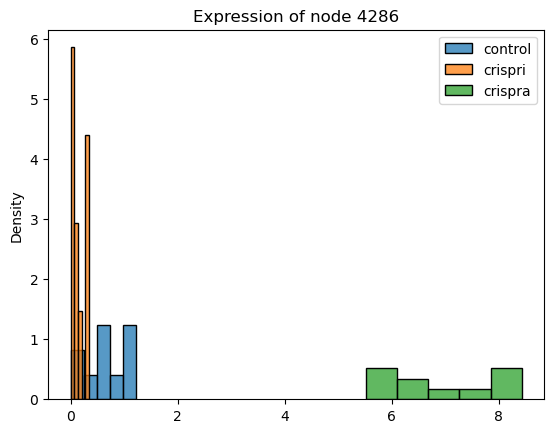

In [15]:

node_perturb = pert.nodes_2perturb[1]#take the first element for demostration, you can take any element you like
index_expr = pert.gNames_.index(node_perturb)#take the index of the node for the expression dimension
sns.histplot(pert.wt[index_expr],label = 'control',stat = 'density')
sns.histplot(pert.crispri_data[pert.nodes_2perturb == node_perturb,index_expr][0],label = 'crispri',stat = 'density')
sns.histplot(pert.crispra_data[pert.nodes_2perturb == node_perturb,index_expr][0],label = 'crispra',stat = 'density')
plt.legend()
plt.title('Expression of node '+node_perturb)

Text(0.5, 1.0, 'Expression of node 4842')

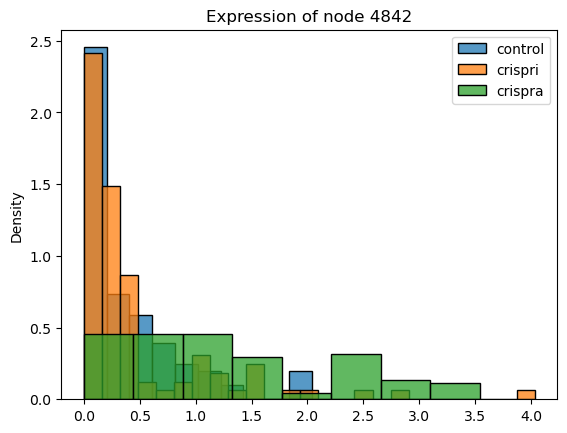

In [16]:
G = pert.grn_.to_networkx()
node_perturb,node_expr = list(G.edges())[0]#take a pair of gene interacting
index_expr = pert.gNames_.index(node_expr)#take the index of the node for the expression dimension
sns.histplot(pert.wt[index_expr],label = 'control',stat = 'density')
sns.histplot(pert.crispri_data[pert.nodes_2perturb == node_perturb,index_expr][0],label = 'crispri',stat = 'density')
sns.histplot(pert.crispra_data[pert.nodes_2perturb == node_perturb,index_expr][0],label = 'crispra',stat = 'density')
plt.legend()
plt.title('Expression of node '+node_expr)

In [16]:
wt,crispri,crispra = pert.technical_noise()

In [12]:
pert.data_path

'SERGIO/data'

In [11]:
pert.save()

In [14]:
pert = perturbation()
pert = pert.load(43,10)

In [ ]:
pert.grn_